In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import date


In [278]:
df_path="./Resources/AGE - household purchases Agg Data.csv"

In [279]:
df_age = pd.read_csv(df_path)

In [280]:
df_age.head ()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [281]:
cleandf=df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,NaN,NaN,Spirits with mixer,NaN,75_and_over,ml,0,1,0,1,...,0,0,1,2,3,1,1,1,2,1
1681,NaN,NaN,Fortified wines,NaN,75_and_over,ml,32,46,40,34,...,24,27,24,24,27,25,28,17,31,14
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4


In [282]:
cleandf.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,--,--,Spirits with mixer,--,75_and_over,ml,0,1,0,1,...,0,0,1,2,3,1,1,1,2,1
1681,--,--,Fortified wines,--,75_and_over,ml,32,46,40,34,...,24,27,24,24,27,25,28,17,31,14
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4


In [283]:
#The popularity of fresh tomatoes within the 30-39 age group between 2001/2 and 2018/9

tominfo= cleandf.loc[(cleandf["Major Food Code"] == "Fresh tomatoes")]
tom2info=tominfo.loc[(tominfo["Age Group"]== "30-39")]
cleantom=tom2info.drop(["Food Category", "Food Group", "Minor Food Code", "Units", "Age Group","Major Food Code"], axis=1)
cleantom=cleantom.transpose()
cleantom.columns =[ 'Amount']
cleantom['Years'] = cleantom.index
cleantom.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  19 non-null     object
 1   Years   19 non-null     object
dtypes: object(2)
memory usage: 456.0+ bytes


## Notes for team!
So first use the cleandf and .loc to find your information, it should display for all age groups.  
If you need to narrow down further use .loc again or combine. Drop your additional columns, see above code for that.  
Transpose the code to make it easier to plot.  
Rename the transposed column.  
Clear and copy over index so you can plot values.  
check data types 

In [284]:
numtom=cleantom['Amount'].astype(int)
years=cleantom["Years"]

Here I am setting variable to plot with because I prefer pyplot, I have changed data type to integer too so I can plot it. 

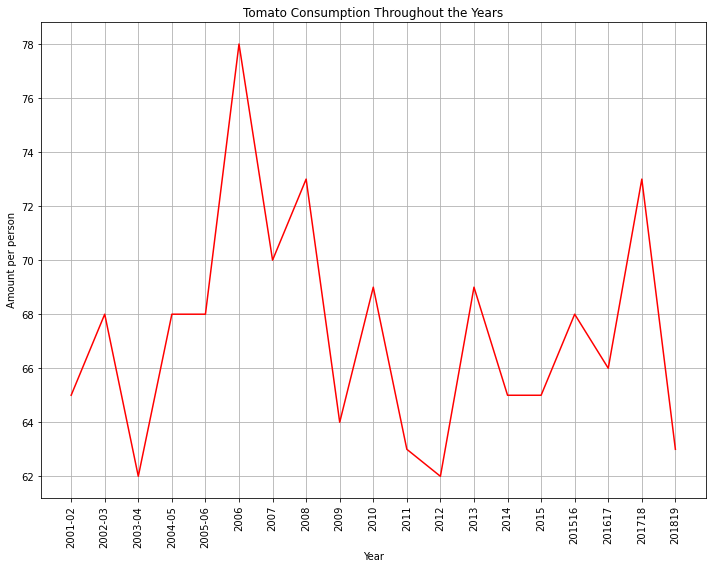

In [285]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(years,numtom,color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years")
plt.show ()

In [286]:
#Why did it dip in 2012? Is it the same for the other age groups?
tominfo
cleantomall=tominfo.drop(["Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleantomall=cleantomall.transpose ()
cleantomall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleantomall['Years'] = cleantomall.index
cleantomall

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,65,83,128,154,139,2001-02
2002-03,68,75,135,146,128,2002-03
2003-04,62,84,132,162,130,2003-04
2004-05,68,79,131,155,135,2004-05
2005-06,68,75,127,154,134,2005-06
2006,78,73,128,153,133,2006
2007,70,79,124,142,121,2007
2008,73,69,112,129,122,2008
2009,64,70,109,134,130,2009
2010,69,77,109,143,140,2010


Once again this is just data cleaning so you can actually use the data to plot with, because we are using multiple age groups I used the below code to convert col data types to int.
Im using pyplot because I feel like it's easier to manipulate, feel free to use pandas if you prefer, the data cleaning process should remain the same :)  

-Happy plotting, peace out 

In [287]:
fix=cleantomall.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
fix.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        19 non-null     int64 
 1   40-49        19 non-null     int64 
 2   50-64        19 non-null     int64 
 3   65-74        19 non-null     int64 
 4   75_and_over  19 non-null     int64 
 5   Years        19 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.0+ KB


In [288]:
alltomyears=fix["Years"]

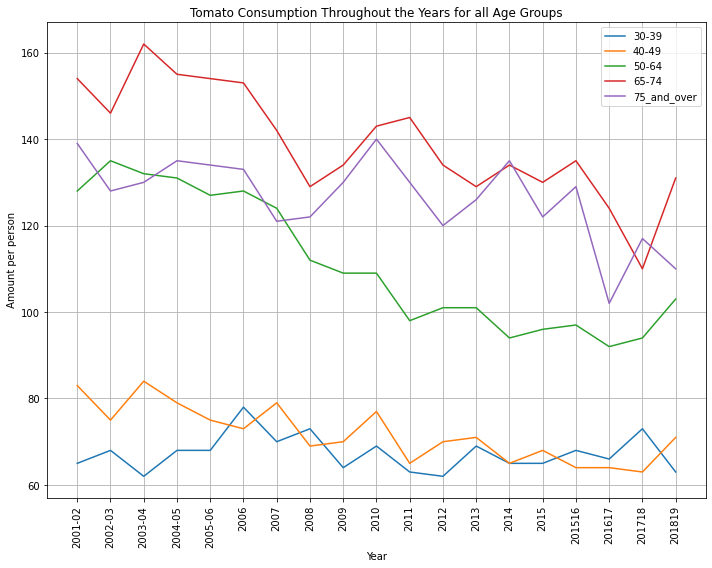

In [289]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(alltomyears,fix['30-39'])
plt.plot(alltomyears,fix['40-49'])
plt.plot(alltomyears,fix['50-64'])
plt.plot(alltomyears,fix['65-74'])
plt.plot(alltomyears,fix['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years for all Age Groups")
plt.show ()

In [290]:

cleanfoodcatdf=cleandf.drop(["Food Group", "Minor Food Code", "Units","Major Food Code"], axis=1)

In [291]:
#The Decline of White bread >:) 

wbread= cleanfoodcatdf.loc[(cleanfoodcatdf["Food Category"] == "White bread")]
wbread=wbread.drop(["Food Category"], axis=1)
wbread=wbread.transpose ()
wbread = wbread.iloc[1: , :]
wbread.columns =['30-39','40-49','50-64','65-74','75_and_over']
wbread['Years'] = wbread.index
wbread
fixbread=wbread.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
allwbreadyears=fixbread["Years"]




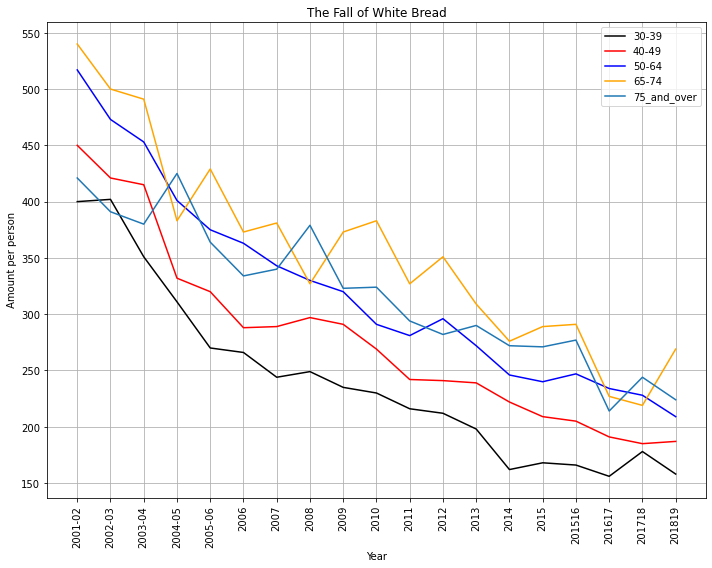

In [292]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(allwbreadyears,fixbread['30-39'], color="black")
plt.plot(allwbreadyears,fixbread['40-49'], color= "red")
plt.plot(allwbreadyears,fixbread['50-64'],color="blue")
plt.plot(allwbreadyears,fixbread['65-74'],color="orange")
plt.plot(allwbreadyears,fixbread['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("The Fall of White Bread")
plt.show ()

In [293]:
#The rise of other breads >:) 
cleanfoodcatdf
obread= cleanfoodcatdf.loc[(cleanfoodcatdf["Food Category"] == "Brown and wholemeal bread")]
obread=obread.transpose ()
obread = obread.iloc[2: , :]
obread
obread.columns =['30-39','40-49','50-64','65-74','75_and_over']
obread['Years'] = obread.index

fixobread=obread.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
allobreadyears=fixobread["Years"]

obread

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,99,108,185,224,245,2001-02
2002-03,97,123,185,238,220,2002-03
2003-04,92,115,166,232,240,2003-04
2004-05,115,138,200,242,261,2004-05
2005-06,145,158,226,239,268,2005-06
2006,146,171,217,253,259,2006
2007,148,150,218,229,253,2007
2008,136,144,192,257,248,2008
2009,133,157,208,235,241,2009
2010,123,150,186,247,229,2010


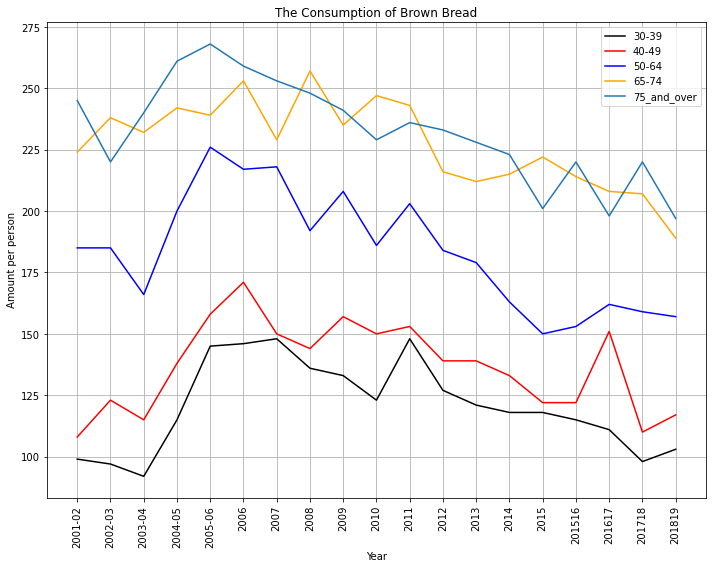

In [294]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(allobreadyears,fixobread['30-39'], color="black")
plt.plot(allobreadyears,fixobread['40-49'], color= "red")
plt.plot(allobreadyears,fixobread['50-64'],color="blue")
plt.plot(allobreadyears,fixobread['65-74'],color="orange")
plt.plot(allobreadyears,fixobread['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("The Consumption of Brown Bread")
plt.show ()

In [295]:
#i75obread=fixobread["75_and_over"].sum ()
#i75wbread=fixbread["75_and_over"].sum ()
#t75bread=i75obread+i75wbread
#t75bread

In [296]:
bandw=pd.merge(fixobread,fixbread, how= "outer", on= ("30-39", "40-49", "50-64", "65-74", "75_and_over"))
bandw
#pd.concat

,30-39,40-49,50-64,65-74,75_and_over,Years_x,Years_y
0,99,108,185,224,245,2001-02,NaN
1,97,123,185,238,220,2002-03,NaN
2,92,115,166,232,240,2003-04,NaN
3,115,138,200,242,261,2004-05,NaN
4,145,158,226,239,268,2005-06,NaN
5,146,171,217,253,259,2006,NaN
6,148,150,218,229,253,2007,NaN
7,136,144,192,257,248,2008,NaN
8,133,157,208,235,241,2009,NaN
9,123,150,186,247,229,2010,NaN


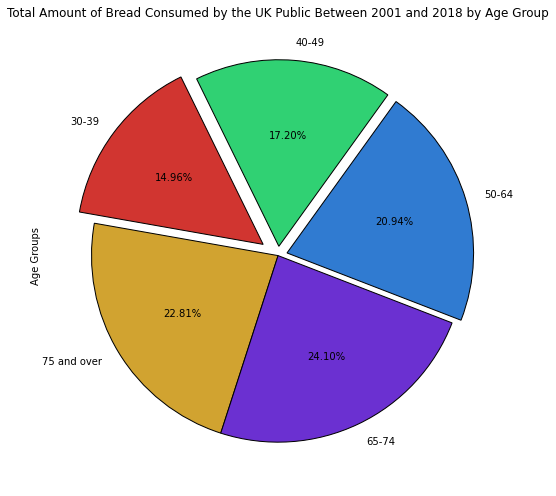

In [297]:
totalobread75=bandw["75_and_over"].sum ()
totalobread65=bandw["65-74"].sum ()
totalobread50=bandw["50-64"].sum ()
totalobread40=bandw["40-49"].sum ()
totalobread30=bandw["30-39"].sum ()

ages = ['75 and over', '65-74', '50-64',
        '40-49', '30-39']
data = [totalobread75,totalobread65,totalobread50,totalobread40,totalobread30]
 
colors = ['#d1a330', '#6b30d1', '#307bd1','#30d173','#d13530']  
explode = (0.0, 0.0, 0.05, 0.05, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
    
    
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ages, colors=colors,autopct="%1.2f%%",explode=explode, startangle=170,wedgeprops=wp)
plt.title("Total Amount of Bread Consumed by the UK Public Between 2001 and 2018 by Age Group")
plt.ylabel("Age Groups")
plt.show ()

In [298]:
#Cofffeeeeeeeeeeeeeeeeee consumption for all age groups

beansground= cleandf.loc[(cleandf["Major Food Code"] == "Coffee beans and ground coffee")]
incof=cleandf.loc[(cleandf["Major Food Code"] == "Instant coffee")]
cofes=cleandf.loc[(cleandf["Major Food Code"] == "Coffee essences")]
merge=pd.concat([beansground,incof, cofes])


In [299]:
cleanmerge=merge.drop(['Food Category','Food Group', 'Minor Food Code', 'Units', 'Major Food Code', 'Age Group'],axis=1)
cleanmerge=cleanmerge.rename(columns = {'2001-02':'2001', '2002-03':'2002',
                              '2003-04':'2003','2004-05': '2004', '2005-06': '2005', '201516': '2016', '201617': '2017',
                                       '201718': '2018', '201819': '2019'})
cleanmerge

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
281,2,2,2,2,2,2,2,3,2,3,4,5,6,6,5,5,8,5,10
618,3,2,4,2,3,3,3,3,3,6,3,5,3,7,9,7,10,11,7
955,4,6,6,5,5,6,6,4,5,5,5,8,8,11,9,9,10,12,15
1292,4,6,5,6,3,3,7,3,4,6,4,9,8,10,10,14,14,15,16
1629,2,3,6,1,3,3,3,6,3,5,4,6,5,7,11,8,8,6,14
282,10,9,10,9,8,10,8,9,10,9,8,9,9,7,8,8,7,9,7
619,12,11,10,11,11,13,11,11,13,12,13,12,11,10,11,10,9,11,9
956,19,17,18,19,18,18,19,20,20,21,18,17,17,15,16,18,16,15,15
1293,18,18,17,21,18,19,20,23,23,23,22,19,21,20,23,24,20,22,25
1630,15,13,15,15,16,15,18,16,20,14,17,18,20,19,19,19,19,20,23


In [300]:
intmerge=cleanmerge.transpose ()
intmerge= intmerge.astype(int)
intmerge['date'] = intmerge.index
intmerge.index.name =("date")
intmerge["sum"] = intmerge.sum(axis=1)

C:\Users\Helen\AppData\Local\Temp\ipykernel_12060\1176387473.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intmerge["sum"] = intmerge.sum(axis=1)


In [301]:
#I'm using this function to calculate the correlation using sum as the variable, as date cannot be used 
intmerge['date_ordinal'] = pd.to_datetime(intmerge['date']).apply(lambda date: date.toordinal())
intmerge

,281,618,955,1292,1629,282,619,956,1293,1630,283,620,957,1294,1631,date,sum,date_ordinal
date,,,,,,,,,,,,,,,,,,
2001,2,3,4,4,2,10,12,19,18,15,0,0,0,0,0,2001,89,730486
2002,2,2,6,6,3,9,11,17,18,13,0,0,0,0,0,2002,87,730851
2003,2,4,6,5,6,10,10,18,17,15,0,0,0,0,0,2003,93,731216
2004,2,2,5,6,1,9,11,19,21,15,0,0,0,0,0,2004,91,731581
2005,2,3,5,3,3,8,11,18,18,16,0,0,0,0,2,2005,89,731947
2006,2,3,6,3,3,10,13,18,19,15,0,0,0,0,0,2006,92,732312
2007,2,3,6,7,3,8,11,19,20,18,1,0,0,0,1,2007,99,732677
2008,3,3,4,3,6,9,11,20,23,16,0,0,0,0,0,2008,98,733042
2009,2,3,5,4,3,10,13,20,23,20,0,0,0,0,0,2009,103,733408


In [302]:
coffeedata=intmerge["sum"]
years=intmerge['date_ordinal']

In [303]:
cor= st.pearsonr(years,coffeedata)
print(round(cor[0],7))

0.9483452


In [304]:
x= years
y= coffeedata
slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
rline = (x*slope) + intercept

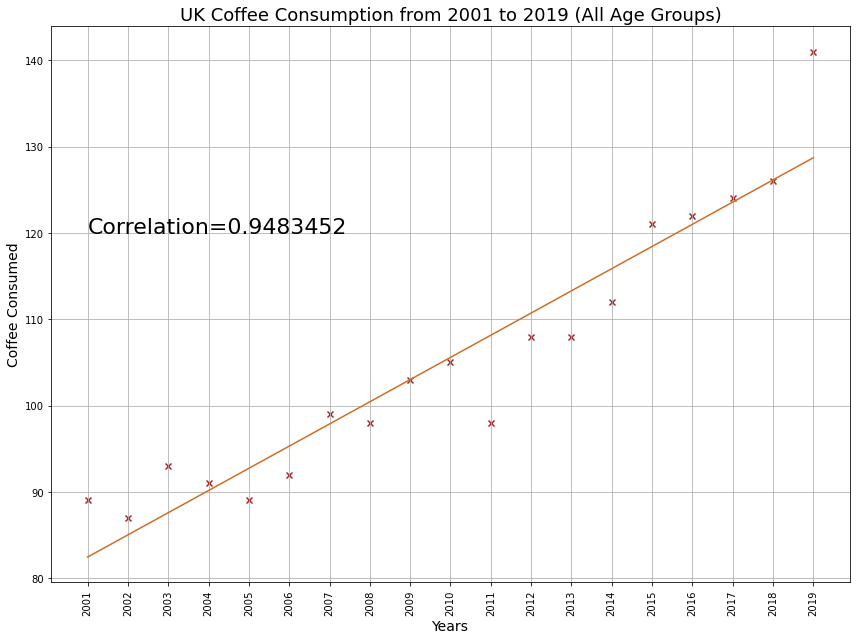

In [305]:
#How has the UK consumption changed since 2001?


sc, ax1 = plt.subplots(figsize=(12, 9))
plt.scatter(intmerge['date'],coffeedata, marker="x" ,color="brown")
plt.title('UK Coffee Consumption from 2001 to 2019 (All Age Groups)', fontsize=18)
plt.plot(rline, color="#d16c24")
plt.text(0, 120, 'Correlation=0.9483452', fontsize = 22) 
plt.xlabel('Years',fontsize =14)
plt.ylabel('Coffee Consumed',fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [306]:
meatinfo= cleandf.loc[(cleandf["Food Group"] == "Carcase meat")]
meatinfo=meatinfo.transpose ()
meatinfo = meatinfo.iloc[6: , :]
meatinfo.columns =['30-39','40-49','50-64','65-74','75_and_over']
#meatinfo['Years'] = meatinfo.index
meatinfo

,30-39,40-49,50-64,65-74,75_and_over
2001-02,148,229,312,329,275
2002-03,160,203,318,348,259
2003-04,168,209,294,328,252
2004-05,156,223,294,318,284
2005-06,169,202,287,329,261
2006,175,207,305,338,279
2007,147,231,295,335,326
2008,166,191,275,272,211
2009,155,212,258,286,229
2010,137,192,283,301,247


In [307]:
meat2info=cleandf.loc[(cleandf["Food Group"] == "Non-carcase meat and meat products")]
meat2info=meat2info.transpose ()
meat2info = meat2info.iloc[6: , :]
meat2info.columns =['30-39','40-49','50-64','65-74','75_and_over']
#meat2info['Years'] = meat2info.index
meat2info

,30-39,40-49,50-64,65-74,75_and_over
2001-02,705,828,946,925,764
2002-03,706,830,972,922,784
2003-04,735,874,951,943,786
2004-05,710,858,937,888,784
2005-06,673,794,985,943,810
2006,675,794,930,944,803
2007,650,802,916,932,787
2008,651,766,902,973,815
2009,651,764,883,"1,009",838
2010,621,776,968,958,817


In [308]:
meatdf=pd.merge(meatinfo,meat2info,
                how= "outer", on= ('30-39','40-49','50-64','65-74','75_and_over'))
meatdf

,30-39,40-49,50-64,65-74,75_and_over
0,148,229,312,329,275
1,160,203,318,348,259
2,168,209,294,328,252
3,156,223,294,318,284
4,169,202,287,329,261
5,175,207,305,338,279
6,147,231,295,335,326
7,166,191,275,272,211
8,155,212,258,286,229
9,137,192,283,301,247


In [309]:
meatdf.replace(',','', regex=True, inplace=True)
meatdf= meatdf.astype(int)
#meatdf=meatdf.transpose ()
#meatdf["sum"] = meatdf.sum(axis=1)

meatdf.describe ()

,30-39,40-49,50-64,65-74,75_and_over
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,396.894737,480.447368,589.763158,611.184211,529.078947
std,256.234035,297.819798,334.226937,326.659742,293.180636
min,116.000000,143.000000,192.000000,211.000000,176.000000
25%,147.250000,191.250000,262.250000,294.250000,248.250000
50%,374.000000,457.000000,584.500000,603.000000,545.000000
75%,647.500000,765.500000,915.000000,930.250000,808.250000
max,735.000000,874.000000,985.000000,1009.000000,891.000000


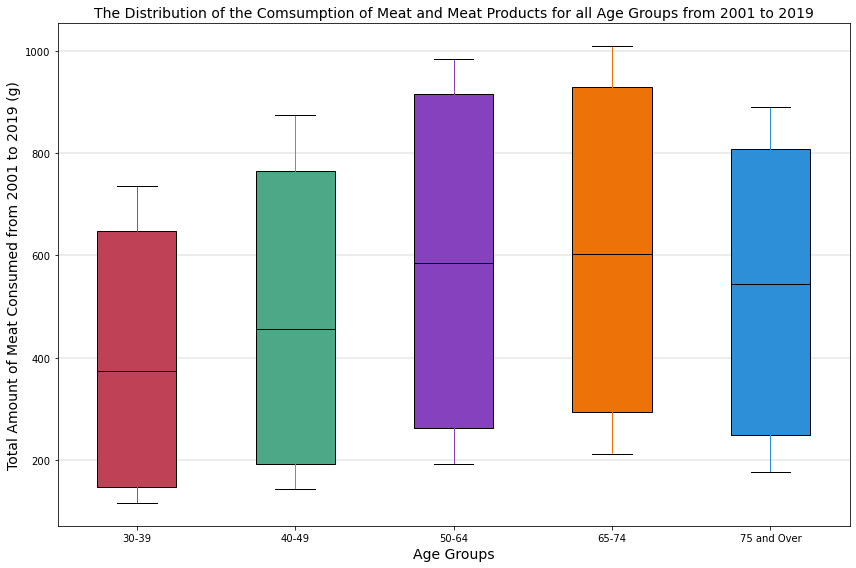

In [310]:
dataset=[meatdf["30-39"],
                meatdf["40-49"],
                meatdf["50-64"],
                meatdf["65-74"],
                meatdf["75_and_over"]
               ]
labels=["30-39","40-49","50-64","65-74","75 and Over"]

bx,plot=plt.subplots (figsize=(12, 8))
flierprops = dict(marker='+', markerfacecolor='black', markersize=10,
                  linestyle='none')

colors = ['#bf4156', '#4da888', '#8641bf','#ed7207','#2e8fd9','black']
a = dict(color=colors[0])
b = dict(color=colors[1])
c = dict(color=colors[2])
d = dict(color=colors[3])
e = dict(color=colors[4])
f = dict(color=colors[5])

plot.grid(color='black', axis='y', linestyle='-', linewidth=0.15, alpha=1)

plot.boxplot(dataset[0], positions=[1], labels=[labels[0]], patch_artist=True, boxprops=dict(facecolor=colors[0]), 
             medianprops=f,
           whiskerprops=a, capprops=f, flierprops=dict(markeredgecolor=colors[0]),widths=(0.5))
plot.boxplot(dataset[1], positions=[2], labels=[labels[1]], patch_artist=True, boxprops=dict(facecolor=colors[1]), 
             medianprops=f,
           whiskerprops=b, capprops=f, flierprops=dict(markeredgecolor=colors[1]),widths=(0.5))
plot.boxplot(dataset[2], positions=[3], labels=[labels[2]], patch_artist=True, boxprops=dict(facecolor=colors[2]), 
             medianprops=f,
           whiskerprops=c, capprops=f, flierprops=dict(markeredgecolor=colors[2]),widths=(0.5))
plot.boxplot(dataset[3], positions=[4], labels=[labels[3]], patch_artist=True, boxprops=dict(facecolor=colors[3]), 
             medianprops=f,
           whiskerprops=d, capprops=f, flierprops=dict(markeredgecolor=colors[3]),widths=(0.5))
plot.boxplot(dataset[4], positions=[5], labels=[labels[4]], patch_artist=True, boxprops=dict(facecolor=colors[4]),
             medianprops=f,
           whiskerprops=e, capprops=f, flierprops=dict(markeredgecolor=colors[4]),widths=(0.5))

plt.xlabel("Age Groups",fontsize=14)
plt.ylabel("Total Amount of Meat Consumed from 2001 to 2019 (g)",fontsize=14)
plt.title("The Distribution of the Comsumption of Meat and Meat Products for all Age Groups from 2001 to 2019",fontsize=14)

plt.show ()